Authors: Jai 20045247

# Clustering

# Drive Link

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CS4168PROJECTGROUP12

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CS4168PROJECTGROUP12


# Imports

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Dataset

In [ ]:
file_path = './steel_industry_data_excerpt.csv'
data = pd.read_csv(file_path)

### Head

In [ ]:
data.head(5)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week
0,2018-01-01 02:30:00,3.78,4.72,0.00,0.0,62.51,100.00,9000,Weekday,Monday
1,2018-01-01 04:15:00,3.28,3.82,0.00,0.0,65.14,100.00,15300,Weekday,Monday
2,2018-01-01 05:45:00,3.28,3.49,0.00,0.0,68.48,100.00,20700,Weekday,Monday
3,2018-01-01 10:00:00,3.64,0.00,16.88,0.0,100.00,21.08,36000,Weekday,Monday
4,2018-01-01 10:30:00,3.71,0.00,18.00,0.0,100.00,20.19,37800,Weekday,Monday


### Tail

In [ ]:
data.tail(5)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week
2185,2018-12-31 06:45:00,3.02,2.12,0.11,0.0,81.85,99.93,24300,Weekday,Monday
2186,2018-12-31 09:45:00,3.17,0.00,14.65,0.0,100.00,21.15,35100,Weekday,Monday
2187,2018-12-31 13:45:00,3.31,0.00,13.68,0.0,100.00,23.52,49500,Weekday,Monday
2188,2018-12-31 20:00:00,4.14,0.00,20.09,0.0,100.00,20.18,72000,Weekday,Monday
2189,2018-12-31 22:45:00,3.82,4.54,0.00,0.0,64.38,100.00,81900,Weekday,Monday


# Selecting Features

In [ ]:
X = data.select_dtypes(include=['float64', 'int64'])

# Pipeline Defination

In [ ]:
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler())])

# Preprocessing Apply

In [ ]:
X_preprocessed = preprocessing_pipeline.fit_transform(X)

# KMeans

This is a widely-used clustering algorithm that partitions the dataset into K distinct, non-overlapping subgroups or clusters. It does so by minimizing the variance within each cluster, which is achieved by assigning each data point to the cluster with the nearest mean. The process iteratively adjusts the positions of the centroids (cluster centers) and the points assigned to each cluster until it converges or meets a specified number of iterations. In the context of this notebook, K-Means is likely used to segment data into groups based on feature similarity, which is a common application in various domains such as market segmentation, document clustering, or image segmentation.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_preprocessed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Cluster Analysis

In [ ]:
data['Cluster_KMeans'] = clusters

### Head

In [ ]:
data.head(5)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Cluster_KMeans
0,2018-01-01 02:30:00,3.78,4.72,0.00,0.0,62.51,100.00,9000,Weekday,Monday,0
1,2018-01-01 04:15:00,3.28,3.82,0.00,0.0,65.14,100.00,15300,Weekday,Monday,0
2,2018-01-01 05:45:00,3.28,3.49,0.00,0.0,68.48,100.00,20700,Weekday,Monday,0
3,2018-01-01 10:00:00,3.64,0.00,16.88,0.0,100.00,21.08,36000,Weekday,Monday,2
4,2018-01-01 10:30:00,3.71,0.00,18.00,0.0,100.00,20.19,37800,Weekday,Monday,2


### Tail

In [ ]:
data.tail(5)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Cluster_KMeans
2185,2018-12-31 06:45:00,3.02,2.12,0.11,0.0,81.85,99.93,24300,Weekday,Monday,0
2186,2018-12-31 09:45:00,3.17,0.00,14.65,0.0,100.00,21.15,35100,Weekday,Monday,2
2187,2018-12-31 13:45:00,3.31,0.00,13.68,0.0,100.00,23.52,49500,Weekday,Monday,2
2188,2018-12-31 20:00:00,4.14,0.00,20.09,0.0,100.00,20.18,72000,Weekday,Monday,2
2189,2018-12-31 22:45:00,3.82,4.54,0.00,0.0,64.38,100.00,81900,Weekday,Monday,0


### Mean for each Attribute

In [ ]:
data.groupby('Cluster_KMeans').mean()

<ipython-input-91-afec239fec2b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Cluster_KMeans').mean()


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Cluster_KMeans,,,,,,,
0,3.972255,4.940673,0.064604,0.000213,60.450307,99.598843,24017.355372
1,65.602363,29.882491,0.395716,0.030081,90.526659,99.922584,51647.846333
2,5.297211,0.121302,17.099545,0.000661,99.797107,28.337851,60986.157025


## Dimensionality Reduction Techniques

* Principal Component Analysis (PCA): PCA is a statistical technique that
transforms the original variables into a new set of variables, the principal components, which are orthogonal (uncorrelated), and which capture the maximum variance in the data. By selecting a subset of the principal components, usually the ones that account for the most variance, PCA reduces the dimensionality of the data. This reduction makes the dataset easier to explore and visualize and can improve the efficiency and effectiveness of clustering algorithms. PCA is often used as a preliminary step before clustering to reduce noise and to find the underlying structure in the data.

* Multidimensional Scaling (MDS): MDS is a technique used to analyze similarity or dissimilarity data. It aims to position each object in N-dimensional space such that the distances between pairs of objects match the given similarities or dissimilarities as closely as possible. In essence, MDS attempts to model similarity or dissimilarity data as distances in a geometric space. This method is particularly useful for visualizing the structure of the data in a lower-dimensional space, making it easier to identify patterns or groups. In the context of the notebook, MDS could be used to visualize the dataset in two or three dimensions to better understand the relationships between data points and to guide the clustering process.

* t-Distributed Stochastic Neighbor Embedding (t-SNE): t-SNE is a non-linear dimensionality reduction technique particularly well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. Essentially, t-SNE converts similarities between data points to joint probabilities and tries to minimize the divergence between these joint probabilities in the original high-dimensional space and the low-dimensional embedding. This method is highly effective at revealing the structure of the data, including clusters, outliers, and intrinsic data patterns. Given its capability to handle complex patterns and relationships within high-dimensional data, t-SNE is a popular choice for exploratory data analysis and visualization prior to clustering.

In [ ]:
dimensionality_reductions = {
    'PCA': PCA(n_components=2),
    'MDS': MDS(n_components=2, random_state=42),
    't-SNE': TSNE(n_components=2, random_state=42)
}

## Plots

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


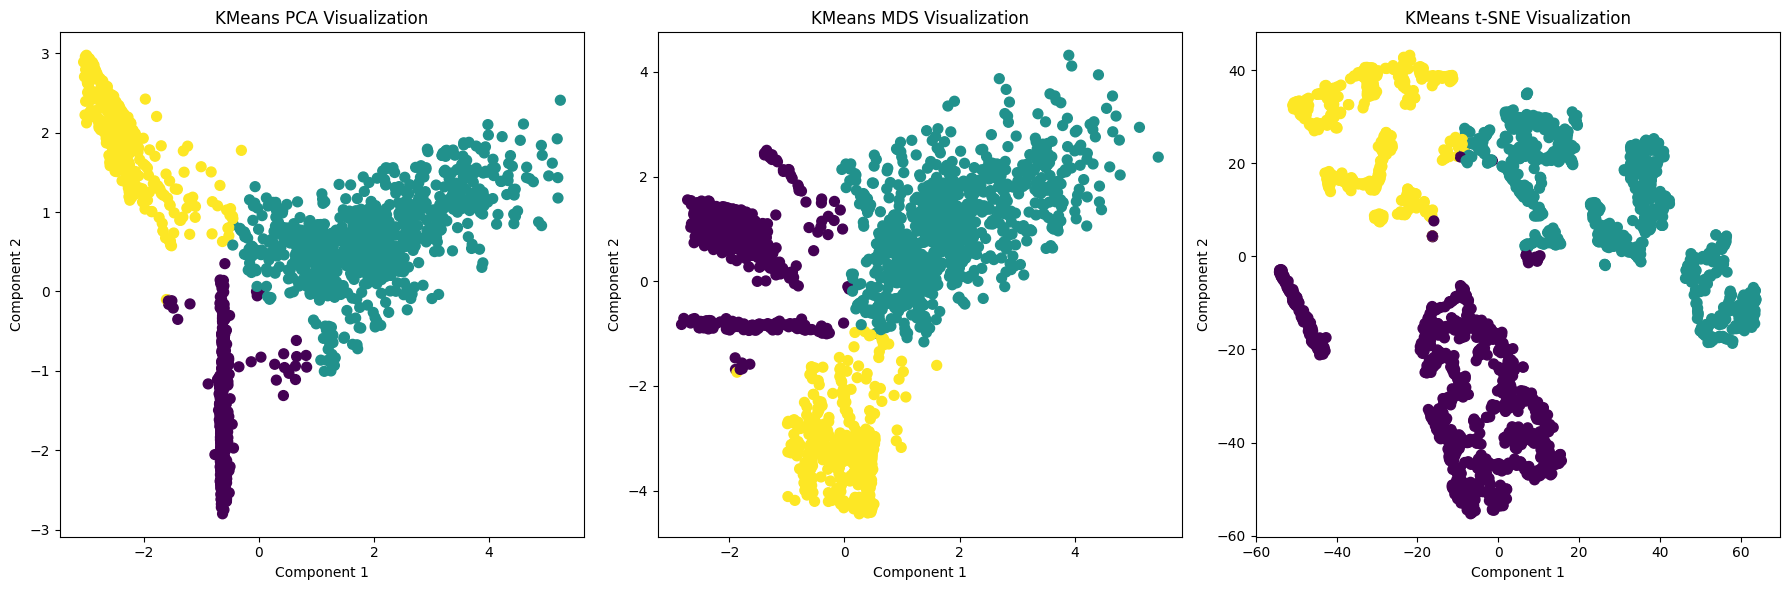

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (name, reducer) in zip(axes, dimensionality_reductions.items()):
    X_reduced = reducer.fit_transform(X_preprocessed)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', s=50)
    ax.set_title(f'KMeans {name} Visualization')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
plt.tight_layout()
plt.show()

* KMeans PCA Visualization: The first graph shows the clustering result after applying PCA for dimensionality reduction. The PCA technique has projected the high-dimensional data onto the plane formed by the first two principal components. Clusters appear as groups of points with the same color. The PCA projection preserves the global structure and variance of the data, which is why the clusters are spread out and their separation can be clearly seen in the form of distinct color groupings.

* KMeans MDS Visualization: The second graph displays the result of applying MDS prior to clustering. MDS aims to place each data point in such a way that the distances between points in the reduced-dimensional space reflect as closely as possible the dissimilarities in the original high-dimensional space. This can sometimes lead to a different visualization of the cluster structure as compared to PCA. The graph shows that MDS has resulted in clusters that are less spread out and more compact, which could indicate that MDS has preserved the data's intrinsic geometrical distances differently than PCA.

* KMeans t-SNE Visualization: The third graph uses t-SNE for dimensionality reduction. t-SNE is particularly adept at maintaining local structures and revealing clusters in data. The clusters in this visualization are more separated and defined, which is a hallmark of t-SNE, reflecting the algorithm's strength in separating clusters even if they were not apparent in the higher-dimensional space. The spread and density of the clusters vary significantly, with some clusters being dense and tightly packed while others are more scattered. This visualization helps in understanding the local relationships and is quite useful for identifying patterns that are not obvious with linear methods like PCA.

# Agglomerative Clustering

This is a type of hierarchical clustering method that builds nested clusters by merging or splitting them successively. This method starts with each data point as a separate cluster and iteratively merges the closest pairs of clusters until all points have been merged into a single cluster, creating a tree or dendrogram of clusters. This approach is advantageous for capturing the hierarchical structure of data and allows for a flexible number of clusters by cutting the dendrogram at a desired level. The notebook likely uses Agglomerative Hierarchical Clustering to explore the data's hierarchical clustering structure, possibly to understand the data's intrinsic hierarchical relationships or to perform hierarchical segmentation tasks.

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=3)
clusters = agglomerative.fit_predict(X_preprocessed)

## Cluster Analysis

In [ ]:
data['Cluster_Agglomerative'] = clusters

### Head

In [ ]:
data.head(5)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Cluster_KMeans,Cluster_Agglomerative
0,2018-01-01 02:30:00,3.78,4.72,0.00,0.0,62.51,100.00,9000,Weekday,Monday,0,2
1,2018-01-01 04:15:00,3.28,3.82,0.00,0.0,65.14,100.00,15300,Weekday,Monday,0,2
2,2018-01-01 05:45:00,3.28,3.49,0.00,0.0,68.48,100.00,20700,Weekday,Monday,0,2
3,2018-01-01 10:00:00,3.64,0.00,16.88,0.0,100.00,21.08,36000,Weekday,Monday,2,1
4,2018-01-01 10:30:00,3.71,0.00,18.00,0.0,100.00,20.19,37800,Weekday,Monday,2,1


### Tail

In [ ]:
data.tail(5)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Cluster_KMeans,Cluster_Agglomerative
2185,2018-12-31 06:45:00,3.02,2.12,0.11,0.0,81.85,99.93,24300,Weekday,Monday,0,2
2186,2018-12-31 09:45:00,3.17,0.00,14.65,0.0,100.00,21.15,35100,Weekday,Monday,2,1
2187,2018-12-31 13:45:00,3.31,0.00,13.68,0.0,100.00,23.52,49500,Weekday,Monday,2,1
2188,2018-12-31 20:00:00,4.14,0.00,20.09,0.0,100.00,20.18,72000,Weekday,Monday,2,1
2189,2018-12-31 22:45:00,3.82,4.54,0.00,0.0,64.38,100.00,81900,Weekday,Monday,0,2


### Mean for each Attribute

In [ ]:
data.drop(columns=['Cluster_KMeans']).groupby('Cluster_Agglomerative').mean()

<ipython-input-101-c68e7300c3f4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.drop(columns=['Cluster_KMeans']).groupby('Cluster_Agglomerative').mean()


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Cluster_Agglomerative,,,,,,,
0,64.200730,29.167104,0.539618,0.029360,90.482346,99.831470,51259.595960
1,4.616604,0.115367,17.145388,0.000377,99.782201,26.802453,60260.377358
2,3.498552,4.707543,0.014197,0.000000,59.671204,99.969136,24098.540146


## Dimensionality Reduction Techniques

* Principal Component Analysis (PCA): PCA is a statistical technique that
transforms the original variables into a new set of variables, the principal components, which are orthogonal (uncorrelated), and which capture the maximum variance in the data. By selecting a subset of the principal components, usually the ones that account for the most variance, PCA reduces the dimensionality of the data. This reduction makes the dataset easier to explore and visualize and can improve the efficiency and effectiveness of clustering algorithms. PCA is often used as a preliminary step before clustering to reduce noise and to find the underlying structure in the data.

* Multidimensional Scaling (MDS): MDS is a technique used to analyze similarity or dissimilarity data. It aims to position each object in N-dimensional space such that the distances between pairs of objects match the given similarities or dissimilarities as closely as possible. In essence, MDS attempts to model similarity or dissimilarity data as distances in a geometric space. This method is particularly useful for visualizing the structure of the data in a lower-dimensional space, making it easier to identify patterns or groups. In the context of the notebook, MDS could be used to visualize the dataset in two or three dimensions to better understand the relationships between data points and to guide the clustering process.

* t-Distributed Stochastic Neighbor Embedding (t-SNE): t-SNE is a non-linear dimensionality reduction technique particularly well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. Essentially, t-SNE converts similarities between data points to joint probabilities and tries to minimize the divergence between these joint probabilities in the original high-dimensional space and the low-dimensional embedding. This method is highly effective at revealing the structure of the data, including clusters, outliers, and intrinsic data patterns. Given its capability to handle complex patterns and relationships within high-dimensional data, t-SNE is a popular choice for exploratory data analysis and visualization prior to clustering.

In [ ]:
dimensionality_reductions = {
    'PCA': PCA(n_components=2),
    'MDS': MDS(n_components=2, random_state=42),
    't-SNE': TSNE(n_components=2, random_state=42)
}

## Plots

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


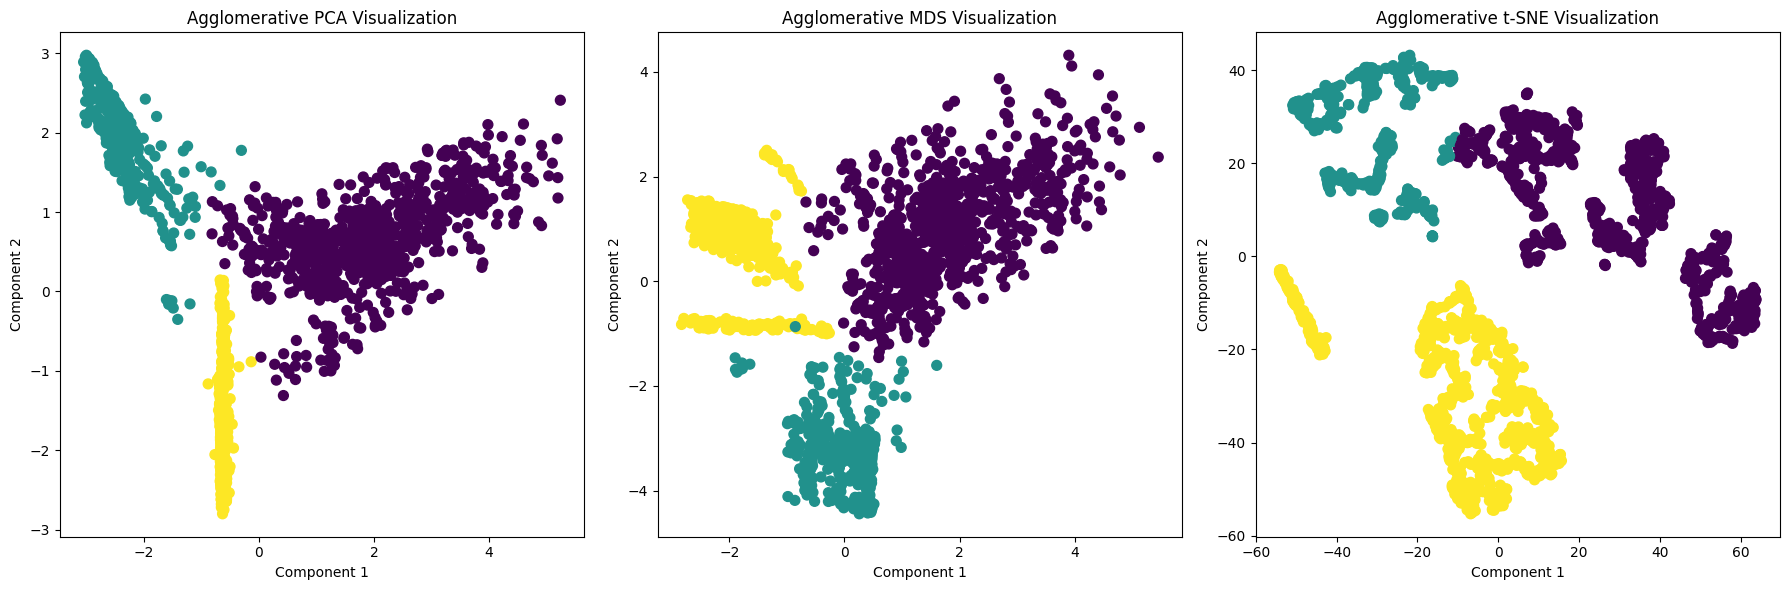

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (name, reducer) in zip(axes, dimensionality_reductions.items()):
    X_reduced = reducer.fit_transform(X_preprocessed)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', s=50)
    ax.set_title(f'Agglomerative {name} Visualization')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
plt.tight_layout()
plt.show()

* Agglomerative PCA Visualization: The first graph shows data points reduced to two principal components from a higher-dimensional space using Principal Component Analysis (PCA). Agglomerative clustering has then grouped these points into clusters, indicated by different colors. PCA tends to preserve global structure at the cost of losing some local structure, which can be seen in the broad spread of data points along the principal component axes. This visualization reveals distinct, mostly non-overlapping clusters, suggesting that the variance captured by PCA has a strong correlation with the underlying cluster structure.

* Agglomerative MDS Visualization: In the second graph the Multidimensional Scaling (MDS) technique has been used to map the high-dimensional data to two dimensions, with agglomerative clustering applied subsequently. MDS aims to preserve the pairwise distances between data points, and this is reflected in the tighter grouping and more pronounced separation between clusters. However, the scale of the axes and the shapes of the clusters are quite different from those in the PCA graph, which indicates that MDS captures different aspects of the data structure. Some clusters that appeared distinct in PCA might merge in MDS, and vice versa.

* Agglomerative t-SNE Visualization: The third graph represents the data transformed by t-Distributed Stochastic Neighbor Embedding (t-SNE) with subsequent agglomerative clustering. t-SNE is particularly effective at maintaining local structure, and as such, it has produced several clearly separated clusters, some of which have non-linear shapes. This is a characteristic feature of t-SNE that it can capture complex, non-linear relationships. The scale and the separation of clusters are more pronounced than in the other two graphs, suggesting that local similarities are significant in defining these clusters.

# Spectral Clustering

Spectral Clustering techniques make use of the eigenvalues (spectrum) of the similarity matrix of the data to perform dimensionality reduction before clustering in fewer dimensions. This approach is particularly useful for identifying clusters that are not necessarily globular and can capture complex cluster structures that traditional methods like K-Means might not be able to. The algorithm involves constructing a similarity graph over the data, computing the Laplacian of the graph, and then clustering the data based on the eigenvectors of the Laplacian. In the notebook, Spectral Clustering might be applied to uncover these more nuanced cluster patterns that are not apparent in the original high-dimensional space.

In [ ]:
spectral = SpectralClustering(n_clusters=3, random_state=42)
clusters = spectral.fit_predict(X_preprocessed)

## Cluster Analysis

In [ ]:
data['Cluster_Spectral'] = clusters

### Head

In [ ]:
data.head(5)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Cluster_KMeans,Cluster_Agglomerative,Cluster_Spectral
0,2018-01-01 02:30:00,3.78,4.72,0.00,0.0,62.51,100.00,9000,Weekday,Monday,0,2,2
1,2018-01-01 04:15:00,3.28,3.82,0.00,0.0,65.14,100.00,15300,Weekday,Monday,0,2,2
2,2018-01-01 05:45:00,3.28,3.49,0.00,0.0,68.48,100.00,20700,Weekday,Monday,0,2,2
3,2018-01-01 10:00:00,3.64,0.00,16.88,0.0,100.00,21.08,36000,Weekday,Monday,2,1,0
4,2018-01-01 10:30:00,3.71,0.00,18.00,0.0,100.00,20.19,37800,Weekday,Monday,2,1,0


### Tail

In [ ]:
data.tail(5)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Cluster_KMeans,Cluster_Agglomerative,Cluster_Spectral
2185,2018-12-31 06:45:00,3.02,2.12,0.11,0.0,81.85,99.93,24300,Weekday,Monday,0,2,2
2186,2018-12-31 09:45:00,3.17,0.00,14.65,0.0,100.00,21.15,35100,Weekday,Monday,2,1,0
2187,2018-12-31 13:45:00,3.31,0.00,13.68,0.0,100.00,23.52,49500,Weekday,Monday,2,1,0
2188,2018-12-31 20:00:00,4.14,0.00,20.09,0.0,100.00,20.18,72000,Weekday,Monday,2,1,0
2189,2018-12-31 22:45:00,3.82,4.54,0.00,0.0,64.38,100.00,81900,Weekday,Monday,0,2,1


### Mean for each Attribute

In [ ]:
data.drop(columns=['Cluster_KMeans','Cluster_Agglomerative']).groupby('Cluster_Spectral').mean()

<ipython-input-108-8f46d44aeb6e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.drop(columns=['Cluster_KMeans','Cluster_Agglomerative']).groupby('Cluster_Spectral').mean()


,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Cluster_Spectral,,,,,,,
0,4.450839,0.101011,17.395613,0.000280,99.794043,25.781828,61043.225806
1,57.602224,26.405671,0.537134,0.026162,87.217495,99.803968,55249.899800
2,3.747070,4.831761,0.062999,0.000138,60.272792,99.472256,14719.394773


## Dimensionality Reduction Techniques

* Principal Component Analysis (PCA): PCA is a statistical technique that
transforms the original variables into a new set of variables, the principal components, which are orthogonal (uncorrelated), and which capture the maximum variance in the data. By selecting a subset of the principal components, usually the ones that account for the most variance, PCA reduces the dimensionality of the data. This reduction makes the dataset easier to explore and visualize and can improve the efficiency and effectiveness of clustering algorithms. PCA is often used as a preliminary step before clustering to reduce noise and to find the underlying structure in the data.

* Multidimensional Scaling (MDS): MDS is a technique used to analyze similarity or dissimilarity data. It aims to position each object in N-dimensional space such that the distances between pairs of objects match the given similarities or dissimilarities as closely as possible. In essence, MDS attempts to model similarity or dissimilarity data as distances in a geometric space. This method is particularly useful for visualizing the structure of the data in a lower-dimensional space, making it easier to identify patterns or groups. In the context of the notebook, MDS could be used to visualize the dataset in two or three dimensions to better understand the relationships between data points and to guide the clustering process.

* t-Distributed Stochastic Neighbor Embedding (t-SNE): t-SNE is a non-linear dimensionality reduction technique particularly well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. Essentially, t-SNE converts similarities between data points to joint probabilities and tries to minimize the divergence between these joint probabilities in the original high-dimensional space and the low-dimensional embedding. This method is highly effective at revealing the structure of the data, including clusters, outliers, and intrinsic data patterns. Given its capability to handle complex patterns and relationships within high-dimensional data, t-SNE is a popular choice for exploratory data analysis and visualization prior to clustering.

In [ ]:
dimensionality_reductions = {
    'PCA': PCA(n_components=2),
    'MDS': MDS(n_components=2, random_state=42),
    't-SNE': TSNE(n_components=2, random_state=42)
}

## Plots

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


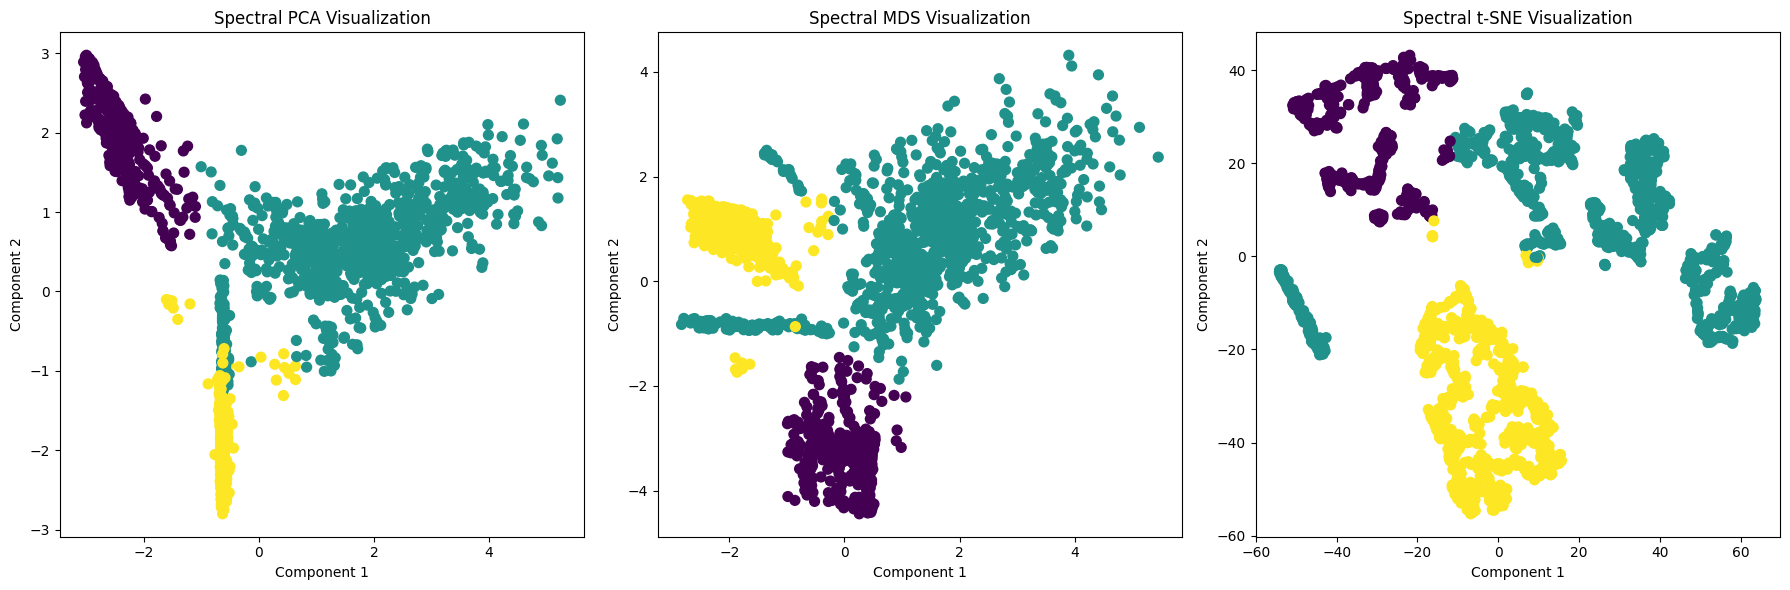

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, (name, reducer) in zip(axes, dimensionality_reductions.items()):
    X_reduced = reducer.fit_transform(X_preprocessed)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', s=50)
    ax.set_title(f'Spectral {name} Visualization')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
plt.tight_layout()
plt.show()

* Spectral PCA Visualization: The first graph shows the clusters formed by spectral clustering on data reduced by PCA. The principal components are linear combinations of the original features that capture the greatest variance. The clusters here seem well-defined with some overlap, particularly where the teal and purple clusters meet. The PCA has likely simplified the data by reducing noise and redundancy, which helps spectral clustering detect the globular clusters.

* Spectral MDS Visualization: The second graph displays the results of spectral clustering on data reduced by MDS. This technique aims to preserve the pairwise distances between the original high-dimensional data points. The clusters appear to be less distinct compared to PCA, with the purple and yellow clusters especially showing more spread and intermixing. This suggests that when the data is mapped to preserve the original distances, the clusters identified by spectral clustering are not as tightly packed.

* Spectral t-SNE Visualization: The third graph illustrates spectral clustering after dimensionality reduction with t-SNE. t-SNE excels at preserving local structures and is particularly good at separating clusters that are not necessarily convex or isotropic. Here, the clusters are very distinct and show clear separation, highlighting the effectiveness of t-SNE in dealing with complex, non-linear manifold structures that spectral clustering can then utilize to define clear boundaries between clusters.